<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Bernstein-Vazirani

In [1]:
# initialisation
import cmath
import math

import numpy as np

# Importing standard Qiskit libraries
from qiskit import (
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    transpile,
)

# basic plot tools
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
from qiskit_ibm_provider import IBMProvider, least_busy

# Loading your IBM Quantum account(s)
provider = IBMProvider()



#### EJERCICIO

Crea las siguientes funciones auxiliares:

- __count_to_digital_values__: una funcion que tome el resultado de cuenas del histograma de salida de una ejecucion de una funcion binaria de n a 1 qubit cuantica y los imprima en el siguiente formato:
```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```
- __get_probabilities__: que tome como entrada un vector de estados y devuelva las probabilidades de todos sus compoentes
- __get__phases__: que tome como entrada un vector de estados y devuelva las fases de todos sus compoentes


In [2]:
def count_to_digital_values(counts):
    data = list(counts.items())
    data = [(qbits[::-1], counts) for qbits, counts in data]
    sorted_by_bitstring = sorted(data, key=lambda tup: tup[0][:-1])

    print("INPUT------OUTPUT-----count----percent")
    suma_total = sum([e[1] for e in sorted_by_bitstring])
    for e in sorted_by_bitstring:
        print(e[0][:-1], "------", e[0][-1], "-----", e[1], "-----", e[1] / suma_total)
    print("shots totales", suma_total)


def get_probabilities(svector):
    return np.power(np.abs(svector.data), 2)


def get_phases(svector):
    return np.array([math.degrees(cmath.polar(c)[1]) for c in svector.data])

# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que codifique el producto interno binario con una cadena dada $s$:

$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1$$

$$f_s(x) = s \cdot x \mod 2$$

## Oráculo para una cadena binaria dada

#### EJERCICIO

Dada una cadena $s$ de n bits, construye un circuito con n qubits de entrada y 1 qubit de salida, que compute el resultado de la funcion del oráculo de Berstein-Vazirani para una funcion caracterizada por esta cadena.

Ejecuta el circuito y construye el histograma de resultados

s 011


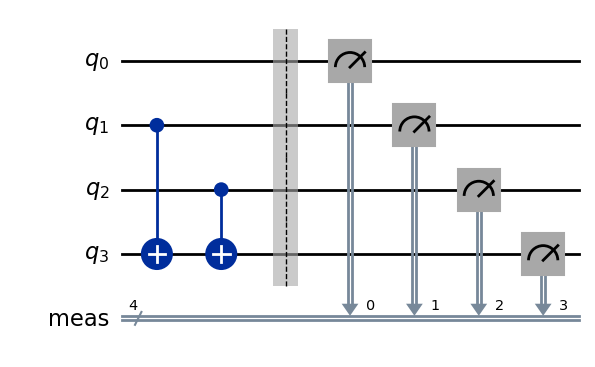

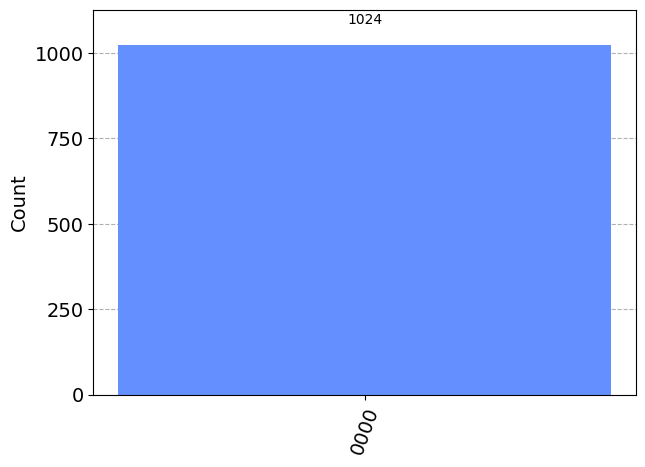

In [3]:
s = "011"  # s2s1s0 the hidden binary string
n = len(s)
print("s", s)

# creamos el circuito
oracle_qc = QuantumCircuit(n + 1)

# Apply the inner-product oracle
for index, bit in enumerate(s):
    bit = int(bit)
    if bit:
        oracle_qc.cx(index, n)


# ponemos las puertas de medida
oracle_qc.measure_all()

# lo dibujamos
display(oracle_qc.draw("mpl", style="iqp"))

# Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
counts = backend.run(oracle_qc).result().get_counts()
display(plot_histogram(counts))

Si ponemos los n __qubits del input__ en superposicion vemos que es la funcion que realiza la operacion que hemos definado. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 129 ----- 0.1259765625
001 ------ 1 ----- 131 ----- 0.1279296875
010 ------ 1 ----- 107 ----- 0.1044921875
011 ------ 0 ----- 122 ----- 0.119140625
100 ------ 0 ----- 127 ----- 0.1240234375
101 ------ 1 ----- 122 ----- 0.119140625
110 ------ 1 ----- 150 ----- 0.146484375
111 ------ 0 ----- 136 ----- 0.1328125
shots totales 1024
```



s 011


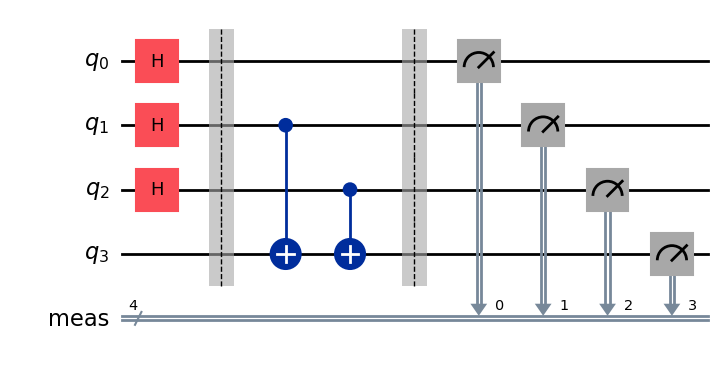

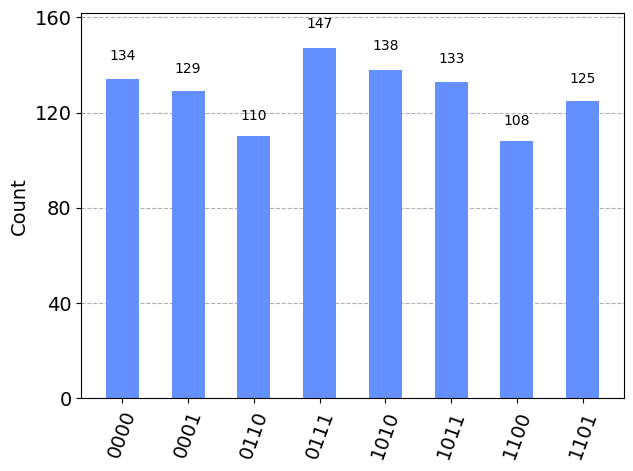

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 134 ----- 0.130859375
001 ------ 1 ----- 108 ----- 0.10546875
010 ------ 1 ----- 138 ----- 0.134765625
011 ------ 0 ----- 110 ----- 0.107421875
100 ------ 0 ----- 129 ----- 0.1259765625
101 ------ 1 ----- 125 ----- 0.1220703125
110 ------ 1 ----- 133 ----- 0.1298828125
111 ------ 0 ----- 147 ----- 0.1435546875
shots totales 1024


In [4]:
n = 3
s = "011"  # s2s1s0 the hidden binary string
print("s", s)

# creamos el circuito
oracle_qc = QuantumCircuit(n + 1)

# ejecucion todas las entradas posibles de input en paralelo
for index, _ in enumerate(s):
    oracle_qc.h(index)

oracle_qc.barrier()

# Apply the inner-product oracle
for index, bit in enumerate(s):
    bit = int(bit)
    if bit:
        oracle_qc.cx(index, n)

# ponemos las puertas de medida
oracle_qc.measure_all()

# lo dibujamos
display(oracle_qc.draw("mpl", style="iqp"))


# Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
counts = backend.run(oracle_qc).result().get_counts()
display(plot_histogram(counts))

count_to_digital_values(counts)

## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo

### EJERCICIO

Crea una funcion de oráculo de n qubits que genere una cadena binaria aleatoria s y devuelva un circuito que computa la funcion $s.xmod(2)$ que viene caracterizada por ella 

In [5]:
# crea una cadena aleatoria s de longitud n bits
n = 5

s = bin(np.random.randint(2**n))[2:].zfill(n)
display(s)

'11010'

In [6]:
### HACER LA FUNCION


def bv_oracle(n):
    # La funcion crea un objeto de QuantumCircuit y lo devuelve
    # El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(n + 1)

    s = bin(np.random.randint(2**n))[2:].zfill(n)
    print("Creado BV-oraculo con s", s)

    # Crea el oraculo
    for index, bit in enumerate(s):
        bit = int(bit)
        if bit:
            oracle_qc.cx(index, n)

    oracle_qc.name = "BV-Oracle"  # to show in the display circuit
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

Creado BV-oraculo con s 011


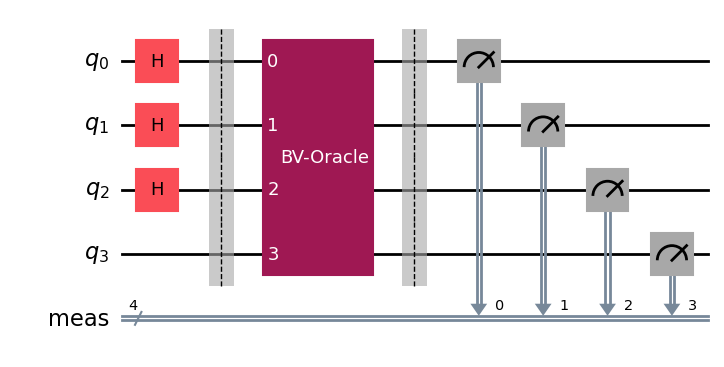

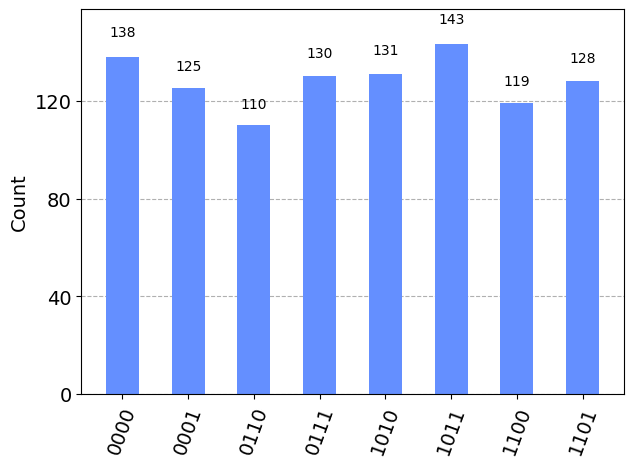

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 138 ----- 0.134765625
001 ------ 1 ----- 119 ----- 0.1162109375
010 ------ 1 ----- 131 ----- 0.1279296875
011 ------ 0 ----- 110 ----- 0.107421875
100 ------ 0 ----- 125 ----- 0.1220703125
101 ------ 1 ----- 128 ----- 0.125
110 ------ 1 ----- 143 ----- 0.1396484375
111 ------ 0 ----- 130 ----- 0.126953125
shots totales 1024


In [7]:
# Creamos un circuito de n qubits+1
n = 3
circuit = QuantumCircuit(n + 1)

# ponemos los qubits de entrada en superposicion
circuit.h(range(n))

circuit.barrier()

# Le añadimos el oráculo con funcion aleatoria -> Utilizar el metodo.compose de la clase QuantumCircuit -> recordar el parametro inplace del metodo
circuit.compose(bv_oracle(n), inplace=True, wrap=True)
# ponemos las puertas de medida
circuit.measure_all()

# Mostramos el circuito
display(circuit.draw("mpl", style="iqp"))

backend = Aer.get_backend("aer_simulator")
counts = backend.run(oracle_qc).result().get_counts()

# mostramos histograma resultado
display(plot_histogram(counts))

# mostramos la ejecucion de la funcion en binario
count_to_digital_values(counts)

# Ejecucion del Algoritmo de Berstein-Vazirani

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector y la visualizacion de plot_bloch_multivector

In [8]:
def svector_viz(qc):
    # tomamos un circuito sin medidas
    # medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    qc.save_statevector()
    # ejecutamos en el simulador
    backend = Aer.get_backend("aer_simulator")
    results = backend.run(qc).result()
    # obtenemos el vector de estados resultado
    psi = results.get_statevector()
    # imprimimos el vector en latex
    display(array_to_latex(psi))
    # imprimimos las probabilidades de cada estado de la base
    display("probabilities", get_probabilities(psi))
    # imprimimos las pases de cada estado de la base
    display("phases", get_phases(psi))
    # visualizamos el plot_bloch_multivector
    display(plot_bloch_multivector(psi, reverse_bits=True))

Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

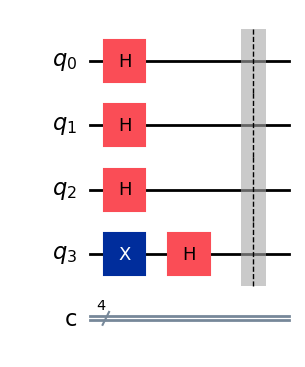

<IPython.core.display.Latex object>

'probabilities'

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

'phases'

array([-7.0167093e-15, -7.0167093e-15, -7.0167093e-15, -7.0167093e-15,
       -7.0167093e-15, -7.0167093e-15, -7.0167093e-15, -7.0167093e-15,
        1.8000000e+02,  1.8000000e+02,  1.8000000e+02,  1.8000000e+02,
        1.8000000e+02,  1.8000000e+02,  1.8000000e+02,  1.8000000e+02])

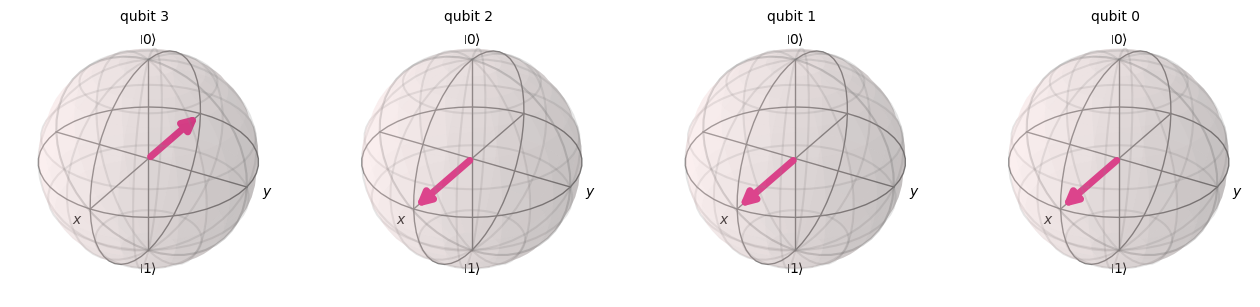

Creado BV-oraculo con s 110


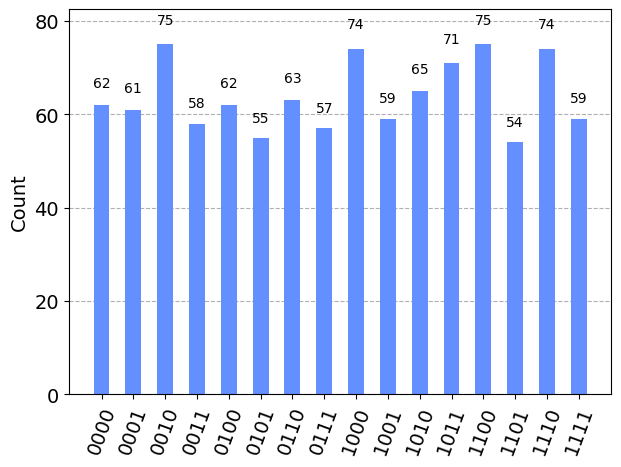

In [9]:
# Creamos un circuito de n qubits+1
n = 3
circuit = QuantumCircuit(
    QuantumRegister(n + 1, name="q"), ClassicalRegister(n + 1, name="c")
)

# PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

# ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

# descomentar para mostrar el circuito y vector de estados en este paso
display(circuit.draw("mpl", style="iqp"))
svector_viz(circuit)

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit.compose(bv_oracle(n), inplace=True)


# PASO 3 - Le añadimos las puertas Hadamard
# circuit.h(range(n))


# PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
[circuit.measure(bit, bit) for bit in range(n)]

# PASO 5- Medimos resultados finales
circuit.measure(n, n)

backend = Aer.get_backend("aer_simulator")
counts = backend.run(circuit).result().get_counts()

# mostramos histograma resultado
display(plot_histogram(counts))

# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Bersntein-Vazirani, para ello:

- Creamos el circuito cuántico, que llamamos <b>bv_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

Creado BV-oraculo con s 101


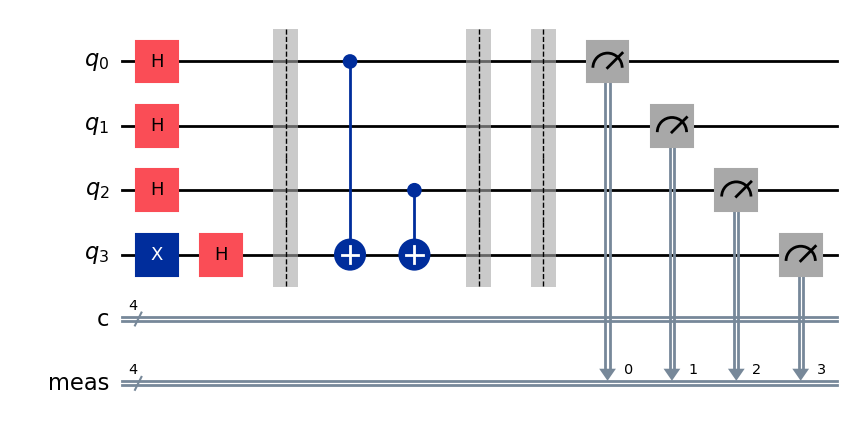

In [10]:
# Creamos un circuito de n qubits+1
n = 3
circuit = QuantumCircuit(
    QuantumRegister(n + 1, name="q"), ClassicalRegister(n + 1, name="c")
)

# PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

# ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit.compose(bv_oracle(n), inplace=True)
circuit.barrier()


# PASO 3 - Le añadimos las puertas Hadamard
# circuit.h(range(n))


# PASO 4- ponemos las puertas de medida
circuit.measure_all()


# Mostramos el circuito
circuit.draw("mpl", style="iqp")

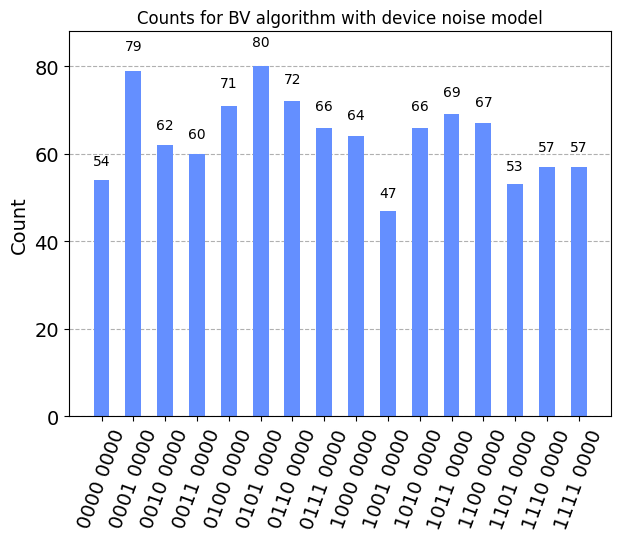

In [11]:
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit_aer import AerSimulator

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

# creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpilamos el circuito para mapearlo a las puertas ruidosas
tcirc = transpile(circuit, backend=device_backend)

# Ejecutamos el circuito y obtenemos el resultado
result_noise = sim_vigo.run(circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for BV algorithm with device noise model")

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Bersntein-Vazirani, para ello:

- Creamos el circuito cuántico, que llamamos <b>bv_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

Creado BV-oraculo con s 101


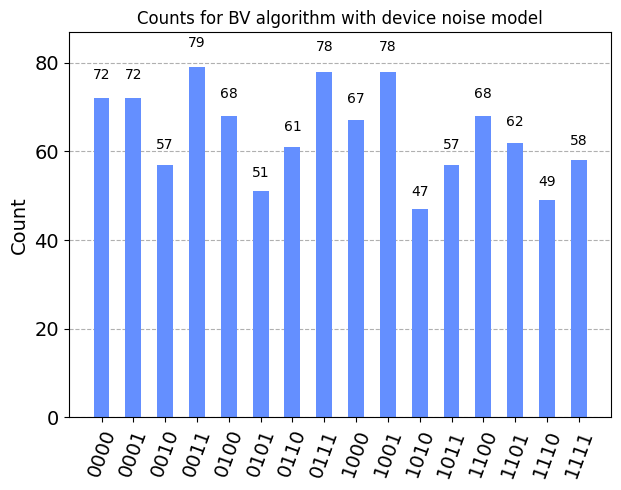

In [12]:
# Construimos el circuito
n = 3
circuit = QuantumCircuit(n + 1)

# PASO 1 - ponemos los qubits de entrada en superposicion
circuit.h(range(n))

# ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier()

# PASO 2- Le añadimos el oráculo con funcion aleatoria
circuit.compose(bv_oracle(n), inplace=True)


# PASO 3 - Le añadimos las puertas Hadamard
# circuit.h(range(n))


# PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
circuit.measure_all()

# ejecutamos en simulador para comprobar que esta ok
result_noise = sim_vigo.run(circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for BV algorithm with device noise model")

In [13]:
# buscamos el backend menos ocupado - using a real qc backend: lest busy
backend = least_busy(
    provider.backends(
        filters=lambda x: x.configuration().n_qubits >= (n + 1)
        and not x.configuration().simulator
        and x.status().operational 
    )
)
print("least busy backend: ", backend)

least busy backend:  <IBMBackend('ibm_osaka')>


In [14]:
import qiskit_ibm_provider.jupyter  # noqa: F401

#lanzamos la ejecucion del job
shots = 20000
job = backend.run(transpile(circuit, backend), shots=shots, )  #optimiza automaticamente para el layout map de qubits (coge el layout optimio y simplifica puertas si puede hacerlo)

%ibm_quantum_dashboard

print('backend: ', backend)
print(job.job_id())

AccordionWithThread(children=(Tab(children=(Box(children=(VBox(layout=Layout(height='100%', width='740px')),),…

<IPython.core.display.Javascript object>

backend:  <IBMBackend('ibm_osaka')>
cqchdwzfejeg0085s7c0


Y cuando termine la ejecucion, consultaremos el resultado